# Ingeniería de Yacimientos: PVT y Líneas de Flujo

Este notebook ilustra el uso de los módulos `petrokit.pvt` y `petrokit.flowline` para realizar cálculos técnicos comunes en ingeniería de producción y yacimientos.

### Contenido:
1. **PVT (Black Oil)**: Generación de tablas de propiedades de fluidos ($P$, $R_s$, $B_o$, $Z$, $B_g$).
2. **Líneas de Flujo**: Cálculo de caída de presión en tuberías horizontales o inclinadas usando modelos monofásicos (Darcy) y multifásicos (Beggs & Brill).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from petrokit.pvt import build_pvt_table
from petrokit.flowline import flowline_pressure_drop_model, plot_flowline_model

## 1️⃣ Propiedades PVT (Black Oil)

Utilizaremos la correlación de **Standing** para estimar las propiedades del petróleo y la aproximación de **Papay** para el factor Z del gas.

In [2]:
# Definición de parámetros del fluido
p_range = np.linspace(500, 5000, 20) # psia
temp_f = 180.0                       # °F
api_gravity = 35.0                  # °API
gas_gravity = 0.7                   # Gravedad específica gas
press_pb = 2500.0                    # Presión de burbuja (opcional)

# Generación de la tabla PVT
pvt_data = build_pvt_table(
    p_psia=p_range, 
    t_f=temp_f, 
    api=api_gravity, 
    gamma_g=gas_gravity, 
    pb_psia=press_pb
)

# Visualización parcial de la tabla
df_pvt = pd.DataFrame(pvt_data)
df_pvt.head()

,P_psia,Rs_scf_stb,Bo_rb_stb,Z,Bg_rb_scf,pb_psia,rsb_scf_stb
0,500.000000,274.645932,1.213339,0.961315,0.006198,2500.0,1820.501508
1,736.842105,429.979304,1.312554,0.946464,0.004141,2500.0,1820.501508
2,973.684211,595.675272,1.424085,0.933846,0.003092,2500.0,1820.501508
3,1210.526316,769.686021,1.546439,0.923461,0.002459,2500.0,1820.501508
4,1447.368421,950.700877,1.678553,0.915309,0.002039,2500.0,1820.501508


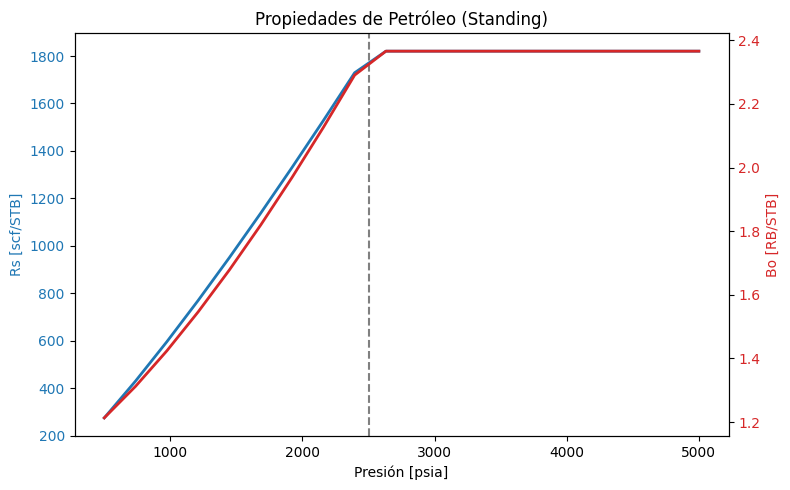

In [3]:
# Graficar Rs y Bo
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Presión [psia]')
ax1.set_ylabel('Rs [scf/STB]', color='tab:blue')
ax1.plot(pvt_data['P_psia'], pvt_data['Rs_scf_stb'], color='tab:blue', label='Rs', linewidth=2)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.axvline(x=press_pb, color='grey', linestyle='--', label='Pb')

ax2 = ax1.twinx()
ax2.set_ylabel('Bo [RB/STB]', color='tab:red')
ax2.plot(pvt_data['P_psia'], pvt_data['Bo_rb_stb'], color='tab:red', label='Bo', linewidth=2)
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Propiedades de Petróleo (Standing)')
fig.tight_layout()
plt.show()

## 2️⃣ Análisis de Líneas de Flujo

Calcularemos la caída de presión en una línea de superficie comparando el modelo de Darcy (monofásico) con Beggs & Brill (multifásico).

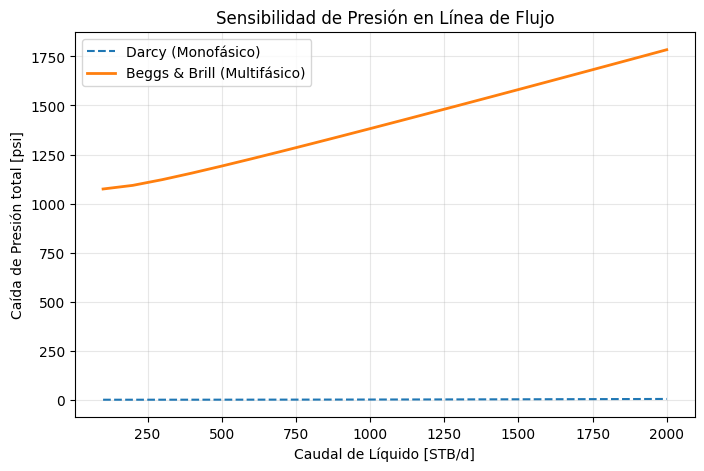

In [4]:
# Parámetros de la línea
q_range = np.linspace(100, 2000, 20)  # Caudal STB/d
L_linea = 5000.0                     # Longitud ft
d_interno = 4.0                      # Diámetro in
rho_liq = 55.0                       # Densidad líquido lb/ft3
mu_liq = 2.0                         # Viscosidad cP

# Comparar modelos
dp_darcy = [flowline_pressure_drop_model('darcy', q, L_linea, d_interno, rho_liq, mu_liq) for q in q_range]
dp_bb = [flowline_pressure_drop_model('beggs_brill', q, L_linea, d_interno, rho_liq, mu_liq, q_gas_mscf_d=500, rho_g=1.5) for q in q_range]

plt.figure(figsize=(8, 5))
plt.plot(q_range, dp_darcy, label='Darcy (Monofásico)', linestyle='--')
plt.plot(q_range, dp_bb, label='Beggs & Brill (Multifásico)', linewidth=2)
plt.xlabel('Caudal de Líquido [STB/d]')
plt.ylabel('Caída de Presión total [psi]')
plt.title('Sensibilidad de Presión en Línea de Flujo')
plt.legend()
plt.grid(alpha=0.3)
plt.show()